In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import hamming_loss, zero_one_loss, f1_score
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset


from sklearn.neighbors import KNeighborsClassifier as kNN

import time

import matplotlib 
import matplotlib.pyplot as plt

In [2]:
scene = pd.read_csv("D:/2021FALL/EC503/Project/coding part/scene/csv_result-scene.csv")
scene = scene.iloc[:, 1:]

In [3]:
X = scene.iloc[:, 0: -6]
y = scene.iloc[:, -6:]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

In [5]:
# Custom accuracy score based on hamming loss implementation

def get_accuracy_score(y_test,y_pred):
    
    if 'numpy' not in str(type(y_pred)):
        y_pred = y_pred.to_numpy()
        
    if 'numpy' not in str(type(y_test)):
        y_test = y_test.to_numpy()
    
    
    assert(y_test.shape == y_pred.shape)
    
    if y_pred.shape[1] <= 5: #For a smaller number of labels, a ratio of half the labels being correct is good enough
        ratio = 0.5
    else:
        ratio = 0.7 #For a number of labels, at least 70% of the predicted labels must be correct
    
    acc_rows = []
    
    for i in range(len(y_test)):
        acc_rows.append(np.count_nonzero(y_test[i]==y_pred[i]))
#         acc_rows.append(np.count_nonzero(y_test.iloc[i,:].values==y_pred.iloc[i,:].values)) #Count the number of matches
        
    acc_rows = [1 if x/y_pred.shape[1] >= ratio else 0 for x in acc_rows] #1 if ratio of match in a row is greater than ratio, else 0
    return sum(acc_rows)/len(acc_rows) # Mean accuracy

In [6]:
k_range = list(range(31))

In [7]:
HL = []
for k_num in k_range[1:]:
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
    HL.append(hamming_loss(y_test, y_pred))

In [8]:
acc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
    y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)
#     display(hamming_loss(y_test, y_pred))
    acc_score.append(get_accuracy_score(y_test, y_pred))

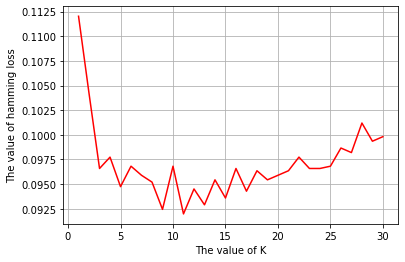

In [9]:
plt.plot(k_range[1:], HL, 'r', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of hamming loss')
plt.grid(True)
plt.savefig('D:/2021FALL/EC503/Project/coding part/BRhamming_loss_scene.png')
plt.show()

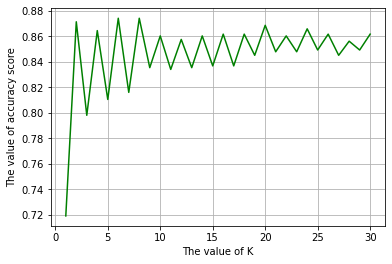

In [10]:
plt.plot(k_range[1:], acc_score, 'g', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of accuracy score')
plt.grid(True)
plt.savefig('D:/2021FALL/EC503/Project/coding part/BRaccuracy_scene.png')
plt.show()

In [11]:
start_time = time.time()
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 9),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.4565441608428955 seconds ---


In [12]:
#LP

In [13]:
LP_HL = []
for k_num in k_range[1:]:
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
    
    LP_HL.append(hamming_loss(y_test, y_pred))

In [14]:
LPacc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
    y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)
#     display(hamming_loss(y_test, y_pred))
    LPacc_score.append(get_accuracy_score(y_test, y_pred))

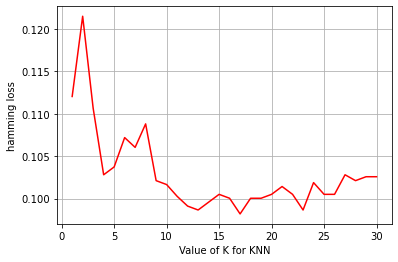

In [15]:
plt.plot(k_range[1:],LP_HL, 'r')
plt.grid(True)
plt.xlabel('Value of K for KNN')
plt.ylabel('hamming loss')
plt.savefig('D:/2021FALL/EC503/Project/coding part/LPhamming_loss_scene.png')

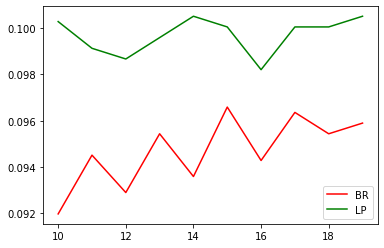

In [16]:
# Compare the hamming loss of BR and LP
k_range10 = np.arange(10, 20, 1)
plt.plot(k_range10, HL[10:20], color = "red")
plt.plot(k_range10, LP_HL[10:20], color = "green")
plt.legend(labels=['BR', 'LP'])
plt.savefig('D:/2021FALL/EC503/Project/coding part/ComHLscene.png')
plt.show()

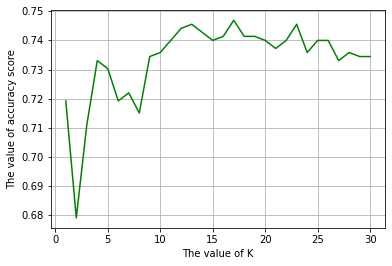

In [17]:
plt.plot(k_range[1:], LPacc_score, 'g')
plt.xlabel('The value of K')
plt.ylabel('The value of accuracy score')
plt.grid(True)
plt.savefig('D:/2021FALL/EC503/Project/coding part/LPaccuracy_yeast.png')
plt.show()

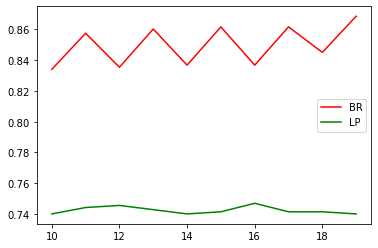

In [18]:
# Compare the accuracy of BR and LP
k_range10 = np.arange(10, 20, 1)
plt.plot(k_range10, acc_score[10:20], color = "red")
plt.plot(k_range10, LPacc_score[10:20], color = "green")
plt.legend(labels=['BR', 'LP'])
plt.savefig('D:/2021FALL/EC503/Project/coding part/ComACCscene.png')
plt.show()

In [19]:
start_time = time.time()
classifier = LabelPowerset(
    classifier = kNN(n_neighbors = 17),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.4462110996246338 seconds ---


In [ ]:
# run time versus #instances, attributes, labels
BR_time = [0.068, 2.370, 2.457]
LP_time = [0.021, 0.209, 0.446]
num_data = [1, 2, 3]
num_att = [72, 103, 294]
num_label = [6, 14, 6]